#**Predicting Churning of Customers for a California Based Telecom Company**

Problem Statement:  
  The telecommunications company, Maven Communications, located in California, is currently experiencing customer churn. It is crucial to identify the specific reasons for customer churn in order to develop effective solutions.Once the root causes for churning has been identified, recommendations need be made to address the issues. Overall, we need to perform data analysis and make reccomenedations for Maven Communications to address the issue of customer churn in order to retain their customers and remain competitive in the market.

In this notebook we have performed following operations::


1.   Data Collection
2.   Data Exploration
2.   Cleaning the Data
3.   Exploratory Data Analysis
      *   Univariate Analysis
      *   Bivariate Analysis
4.   Feature Engineering
5.   Model Building and Selection 
6.   Performance Metrics








# Data Collection

We have collected the data form Maven telecom company which is publicly available dataset. We have downloaded the csv data and uploaded into this notebool using pandas.

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn 

In [ ]:
#Importing Data using pandas
df = pd.read_csv('/content/telecom_customer_churn.csv')

In [ ]:
# Overview of the data
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Data Exploration

In [ ]:
# To know detailed information of the data like data type and number of entries each variable consists.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

As we can see data contains 7043 entries and 37 data attributes which 
includes both categorical and numerical data types. As we are predicting the churn rate of customers we are considering the customer status as the dependent variable and rest of the variables as independent variables.







In [ ]:
# Making a copy of original dataset
df_copy = df

In [ ]:
df.drop(['Customer ID','Zip Code','Latitude', 'Longitude'],axis='columns',inplace=True)

In [ ]:
# Describe functions computes various descriptive statistics of a dataset. But it is only performed on numerical variables.
df.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


From the above data summary we have few key insights:


1.   It seems more than 75% of customers have tenure less than 55 months
2.   Also mostly 75% of the customers ages are around 60.
3.   Consumtion of Avg Monthly data usage is also less than 20GB by 50% of the population.




# Data Cleaning

**Missing Value Analysis**

Based on the above data overview we have observed some missing entries in some of the variables. So we are performing the missing value analysis. 

In [ ]:
# Checking the data if we have missing values in the dataset
df_missing = pd.DataFrame(100*df.isnull().sum()/df.shape[0] , columns=['Missing Values Percentage'])  # Generates the percentage of missing values in each variable

#Filtering out the variables which have missing values in it.
df_missing[df_missing['Missing Values Percentage']>0] 

,Missing Values Percentage
Avg Monthly Long Distance Charges,9.683374
Multiple Lines,9.683374
Internet Type,21.666903
Avg Monthly GB Download,21.666903
Online Security,21.666903
Online Backup,21.666903
Device Protection Plan,21.666903
Premium Tech Support,21.666903
Streaming TV,21.666903
Streaming Movies,21.666903


The above table represents the variables with missing values percentage.

**Handling Missing values**

In [ ]:
# Segregating the variables with missing values. 
missing_values_mask = df.isnull()
columns_with_missing_values = df.columns[missing_values_mask.any()].tolist()

df_missing_values_num = df[columns_with_missing_values].select_dtypes(include='float64')
df_missing_values_cat = df[columns_with_missing_values].select_dtypes(include='object')

As we have missing values in both categorical and numerical varibales. We are replacing missing values with **Mean value** for the numerical variables and for categorical variables we repalced it with **Mode value**

In [ ]:
# Replacing with mean value for numerical variables
for i in df_missing_values_num:
  mean = df_missing_values_num[i].mean()
  df_missing_values_num[i] = df_missing_values_num[i].fillna(mean)

# Checking if still there any null values present 
df_missing_values_num.isnull().sum()

Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
dtype: int64

In [ ]:
# Replacing with mean value for categorical variables with mode value.
for i in df_missing_values_cat:
  df_missing_values_cat[i] = df_missing_values_cat[i].fillna(df[i].mode()[0])

# Checking if still there any null values present 
df_missing_values_cat.isnull().sum()

Multiple Lines            0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Churn Category            0
Churn Reason              0
dtype: int64

In [ ]:
# Post handling missing values clubing the cleaned data to actual dataframe.
col = df_missing_values_cat.columns
df = df.drop(col, axis = 1)
col1 = df_missing_values_num
df = df.drop(col1, axis = 1)

df_1 = pd.concat([df, df_missing_values_cat], axis = 1)
df_final = pd.concat([df_1, df_missing_values_num], axis = 1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Internet Service                   7043 non-null   object 
 10  Contract                           7043 non-null   object 
 11  Paperless Billing                  7043 non-null   objec

As we can see there are no NA values present from the above summary.

# Deriving New Data Attributes For visualisation

In [ ]:
df_final['Tenure in Months'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64



*   Max Tenure is 72 months, So will divide the tenure months into bins for 
visulaization




In [ ]:
# Converting the tenure months into bins
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_final['tenure_group'] = pd.cut(df_final['Tenure in Months'], range(1, 80, 12), right=False, labels=labels)
df_final.drop(columns=['Tenure in Months'], axis = 1, inplace= True)

df_final['tenure_group'].value_counts()


1 - 12     2186
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
# Categorizing Age into 3 Categories
# Teenagers: [0,19]
# Adult: [19,60]
# Senior Citizen: [60,80]
df_final['Age_Group'] = pd.cut(x=df_final['Age'], bins=[0, 19, 60, 80], labels=['Teenagers', 'Adults', 'Senior Citizens'])
df_final['Age_Group'].value_counts()

Adults             5254
Senior Citizens    1662
Teenagers           127
Name: Age_Group, dtype: int64

In [ ]:
# Dividing the avgerage usage of data into three categories based on the usage
# Categories are - Low, Meidum and High
df_final['Avg_Usage_of_Data'] = pd.cut(x=df_final['Avg Monthly GB Download'], bins=[0, 15, 30, 90], labels=['Low', 'Medium','High'])
df_final['Avg_Usage_of_Data'].value_counts()

Medium    4039
Low       1802
High      1202
Name: Avg_Usage_of_Data, dtype: int64

In [ ]:
# Dividing the Total Revenue into four categories based on the usage
# Categories are - Lowest, Moderate, High & Expensive
df_final['Revenue_From_Customer'] = pd.cut(x=df_final['Total Revenue'], bins=[0, 610, 2200, 4800, 12000], labels=['Lowest', 'Moderate','High', 'Expensive'])
df_final['Revenue_From_Customer'].value_counts()

Moderate     1833
Lowest       1769
Expensive    1762
High         1679
Name: Revenue_From_Customer, dtype: int64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   object  
 1   Age                                7043 non-null   int64   
 2   Married                            7043 non-null   object  
 3   Number of Dependents               7043 non-null   int64   
 4   City                               7043 non-null   object  
 5   Number of Referrals                7043 non-null   int64   
 6   Offer                              7043 non-null   object  
 7   Phone Service                      7043 non-null   object  
 8   Internet Service                   7043 non-null   object  
 9   Contract                           7043 non-null   object  
 10  Paperless Billing                  7043 non-null   object  
 11  Payment Method                     7043 non

# Exploratory Data Analysis

For data visualisation we have perfomed Univariate and Bivariate analysis

**Univariate Analysis**

[Text(0.5, 1.0, 'Customer Status Distribution')]

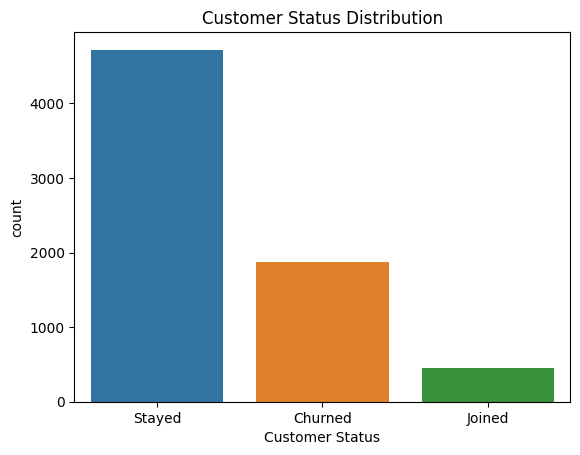

In [ ]:
# Checking the distribution of target data for checking any imbalance data
import seaborn as sns
sns.countplot(x = 'Customer Status', data = df).set(title='Customer Status Distribution')

In [ ]:
100*df['Customer Status'].value_counts()/len(df['Customer Status'])

Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: Customer Status, dtype: float64

In [ ]:
# As we have created derived data variables before we are using those variables for the visualisation
columns=[ 'Age_Group', 'Married', 'Contract', 'Payment Method', 'tenure_group','Avg_Usage_of_Data']
df_visualisation = df_final[columns]

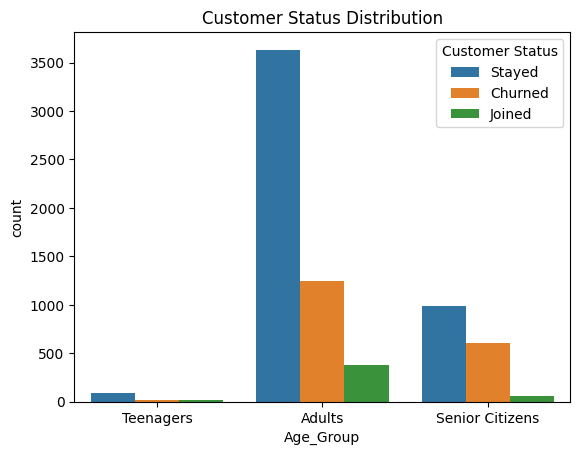

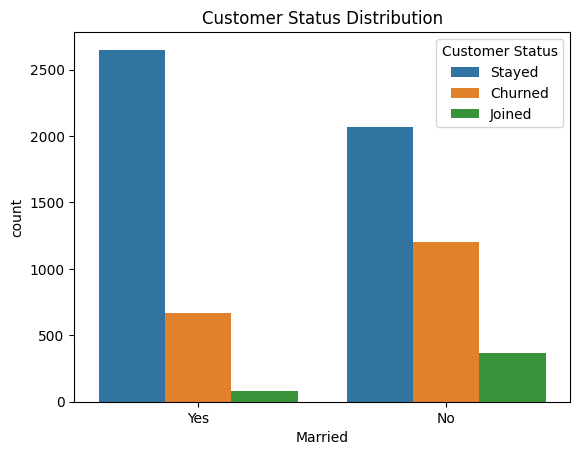

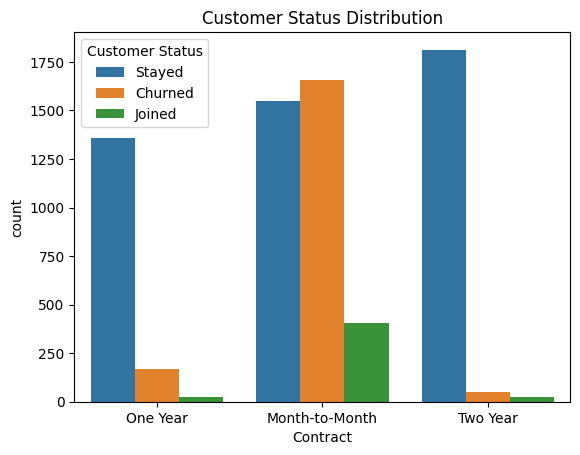

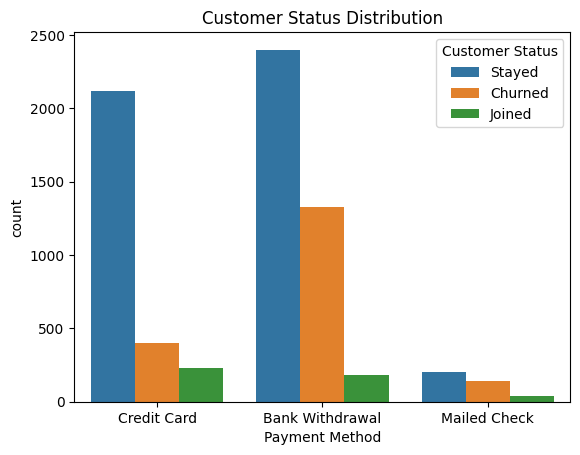

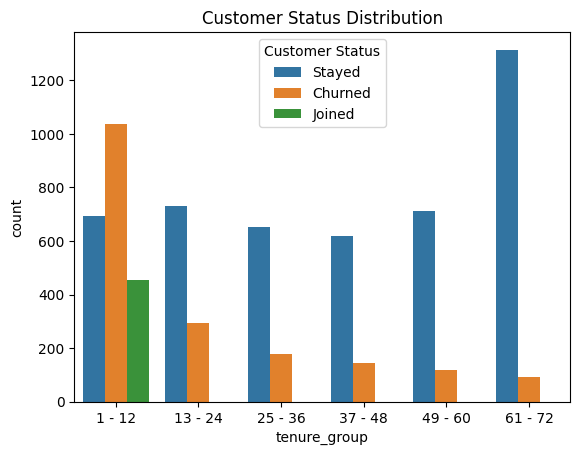

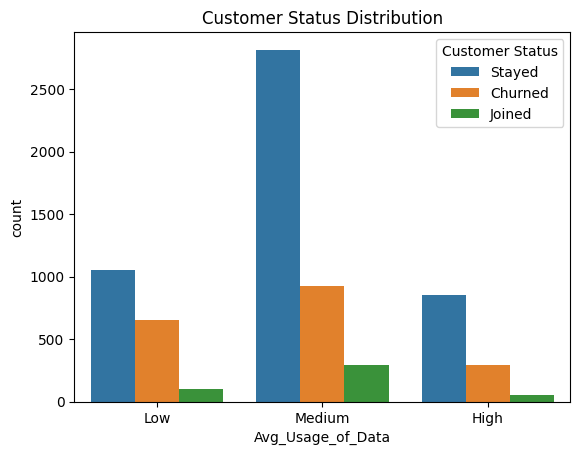

In [ ]:
# We are using seaborn library for the univariate analysis.
for i, predictor in enumerate(df_visualisation):
    plt.figure(i)
    sns.countplot(data=df_final, x=predictor, hue='Customer Status').set(title='Customer Status Distribution')

**Bivariate Analysis**

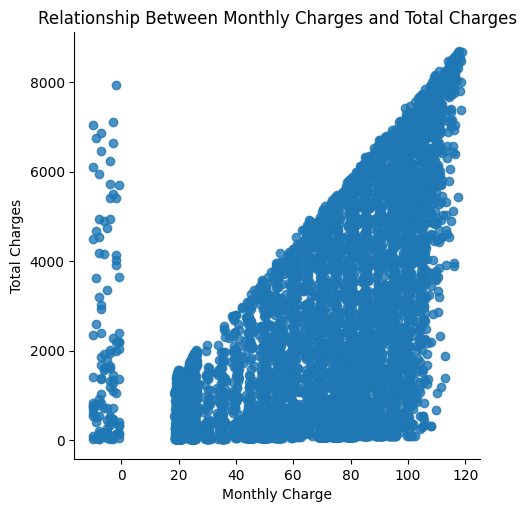

In [ ]:
# Checking if there is any relationship between Monthly charges and Total Charges
#  Monthly Charges - Indicates the customer’s current total monthly charge for all their services from the company
#  Total Charges - Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges 
sns.lmplot(data=df_final, x='Monthly Charge', y='Total Charges', fit_reg=False).set(title = 'Relationship Between Monthly Charges and Total Charges')

Based on the above chart As Monthly charges increases Total Charges also increases which is obvious and it shows that they are coorelated.

* Ploting Churn by Monthly & Total Charges

In [ ]:
# We are using Label encoder to segregate target variable into churned and stayed
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['Customer Status'] = label_encoder.fit_transform(df_final['Customer Status'])

Using the Label Encoder we are converting the Customer status variable into numerical variable: 


1.   0 - Churned
2.   1 - Joined
3.   2 - Stayed



In [ ]:
df_final['Customer Status'].value_counts()

2    4720
0    1869
1     454
Name: Customer Status, dtype: int64

Text(0.5, 1.0, 'Monthly charges by churn')

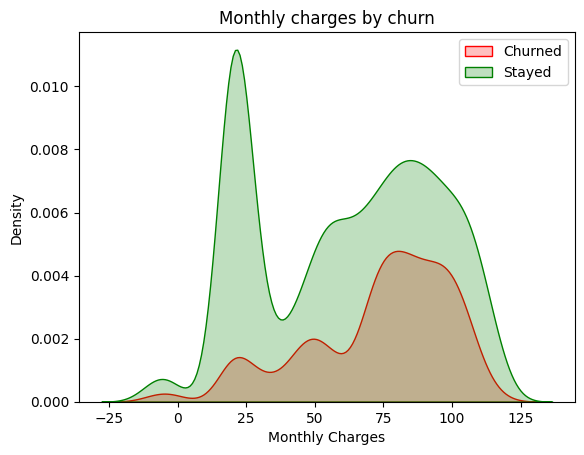

In [ ]:
# Create a list of the categories you want to include in the legend
hue_order = [2, 0]

# Create the kdeplot with the specified hue_order
sns.kdeplot(df_final, x='Monthly Charge', hue='Customer Status', palette={0: 'red', 2: 'green'},
            fill=True, hue_order=hue_order)

# Set the legend, labels, and title
plt.legend(["Churned", "Stayed"], loc='upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

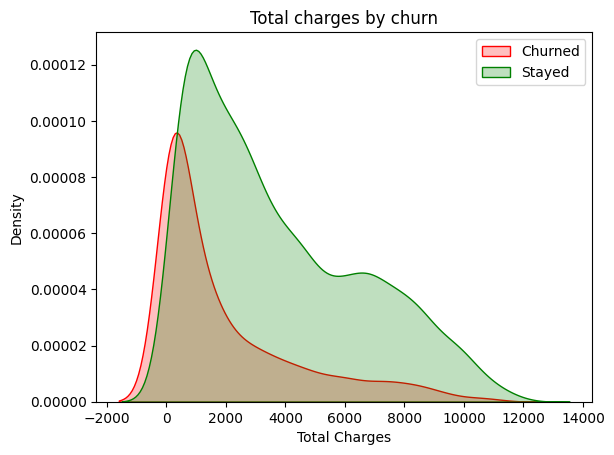

In [ ]:
# Create a list of the categories you want to include in the legend
hue_order = [2, 0]

# Create the kdeplot with the specified hue_order
sns.kdeplot(df_final, x='Total Revenue', hue='Customer Status', palette={0: 'red', 2: 'green'},
            fill=True, hue_order=hue_order)

# Set the legend, labels, and title
plt.legend(["Churned", "Stayed"], loc='upper right')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Total charges by churn')

In [ ]:
# Ploting the Churn based category with Churn Reason
import plotly.express as px

df_Churn = pd.DataFrame(df_final["Churn Category"].value_counts())
df_Churn["Reason"] = df_Churn.index
fig = px.bar(df_Churn, x="Reason", y="Churn Category", title="Churn Category & Reason")
fig.show()

In [ ]:
# Ploting the distribution of Churn Reasons
df_Churn=pd.DataFrame(df_final["Churn Reason"].value_counts())
df_Churn["Reason"]=df_Churn.index
df_Churn.rename(columns = {'Churn Reason':'Count'}, inplace = True)
fig=px.bar(df_Churn, x="Count", y="Reason", orientation='h',title=("Distribution of Churn Reasons"))
fig.show()

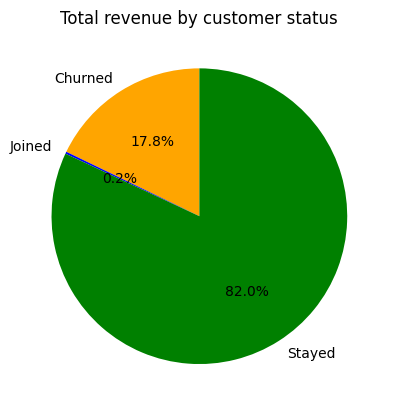

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total revenue for each customer status
revenue_by_status = df_final.groupby('Customer Status')['Total Charges'].sum()

# Creating a pie chart 
labels = ['Churned', 'Joined', 'Stayed']
colors = ['orange', 'blue', 'green']
plt.pie(revenue_by_status, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Total revenue by customer status')
plt.show()


In [ ]:
# Ploting Age Distribution by Customer Status
fig = px.histogram(df, color="Customer Status", y='Age', barmode='group', histfunc="count")
fig.update_layout(title='Age Distribution by Customer Status', xaxis_title='Age', yaxis_title='Count')
fig.show()

# Feature Engineering

In [ ]:
# Removing Unwanted variables

df_pred = df_final.drop(columns=['City','Total Charges','Total Refunds',
                                 'Total Extra Data Charges','Total Long Distance Charges','Avg Monthly Long Distance Charges', 
                                 'Avg Monthly GB Download', 'Avg_Usage_of_Data', 'Revenue_From_Customer'], axis='columns')


In [ ]:
# Converting the categorical data types into numerical data type using Label Encoder
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# looping through all columns in the dataframe 
for column_name in df_pred.columns:
    # checking if the column data type is object (i.e. categorical)
    if df_pred[column_name].dtype == object:
        # applying label encoding to the column
        df_pred[column_name] = le.fit_transform(df_pred[column_name])


# Converting the categorical data types into numerical data type using Label Encoder
df_pred['tenure_group'] = df_pred['tenure_group'].cat.codes
df_pred['Age_Group'] = df_pred['Age_Group'].cat.codes

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   int64  
 1   Age                     7043 non-null   int64  
 2   Married                 7043 non-null   int64  
 3   Number of Dependents    7043 non-null   int64  
 4   Number of Referrals     7043 non-null   int64  
 5   Offer                   7043 non-null   int64  
 6   Phone Service           7043 non-null   int64  
 7   Internet Service        7043 non-null   int64  
 8   Contract                7043 non-null   int64  
 9   Paperless Billing       7043 non-null   int64  
 10  Payment Method          7043 non-null   int64  
 11  Monthly Charge          7043 non-null   float64
 12  Total Revenue           7043 non-null   float64
 13  Customer Status         7043 non-null   int64  
 14  Multiple Lines          7043 non-null   

# Model Building

* When it comes model building there are few steps need to be done before fitting the data into the model. 

* Post pre-processing the data we need to split the data into train and test data sets. So that we train the models by using train dataset and we can predict the churn variable using this models.

* As the target variable is binary type variable, we have chosen classification models like logistic regression, decision tree classifier, Random forest classifier, naïve bayes and support vector machine.

* We have evaluated each model using the performance metrics like using confusion matrix, accuracy , precision and f1-score.


In [ ]:
# Modifying the Customer status variable
mask = df_final['Customer Status'] == 1
df_pred = df_pred.drop(df_pred[mask].index)
df_pred.loc[df_pred['Customer Status'] == 2, 'Customer Status'] = 1
df_pred['Customer Status'].value_counts()

1    4720
0    1869
Name: Customer Status, dtype: int64

In [ ]:
# Splitting the data into train and test dataset 
from sklearn.model_selection import train_test_split

X = df_pred.drop('Customer Status', axis=1)  # dropping the target column from the features
y = df_pred['Customer Status']  # setting the target column as the label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# We have selected few classification models and stored into a list and iterated the whole model fitting process 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Classifiers = [LogisticRegression(),  DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]

cols=["Classifiers", "Accuracy"]
app = pd.DataFrame(columns=cols)
for clf in Classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Test Data Results')
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print("Accuracy:", accuracy)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision*100)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Recall:", recall*100)
    print("F1 Score:", f1*100)

    print("="*50)
    clf_res = pd.DataFrame([[name, accuracy]], columns=cols)
    app = app.append(clf_res)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression
Test Data Results
Accuracy: 86.03945371775417
Confusion Matrix:
 [[290  93]
 [ 91 844]]
Precision: 90.07470651013874
Recall: 90.26737967914438
F1 Score: 90.17094017094016
DecisionTreeClassifier
Test Data Results
Accuracy: 94.08194233687405
Confusion Matrix:
 [[338  45]
 [ 33 902]]
Precision: 95.2481520591341
Recall: 96.47058823529412
F1 Score: 95.85547290116897
RandomForestClassifier
Test Data Results
Accuracy: 96.35811836115326
Confusion Matrix:
 [[339  44]
 [  4 931]]
Precision: 95.48717948717949
Recall: 99.57219251336899
F1 Score: 97.48691099476441
GaussianNB
Test Data Results
Accuracy: 94.38543247344461
Confusion Matrix:
 [[326  57]
 [ 17 918]]
Precision: 94.15384615384616
Recall: 98.18181818181819
F1 Score: 96.12565445026178
SVC
Test Data Results
Accuracy: 76.63125948406677
Confusion Matrix:
 [[162 221]
 [ 87 848]]
Precision: 79.32647333956969
Recall: 90.69518716577541
F1 Score: 84.63073852295409


# Model Selection


* Compared the accuracy of each model, three models which are performing well, Based on our business problem we have chosen Random forest Classifier.

* The reasons for selecting RF classifier are the model **Handles Unbalanced Data** better than other models and its **Robust to Outliers and Non-linear Data.**

* We even plotted the confusion matrix and from which we can see balanced True Positive and True Negative values with great precision value.


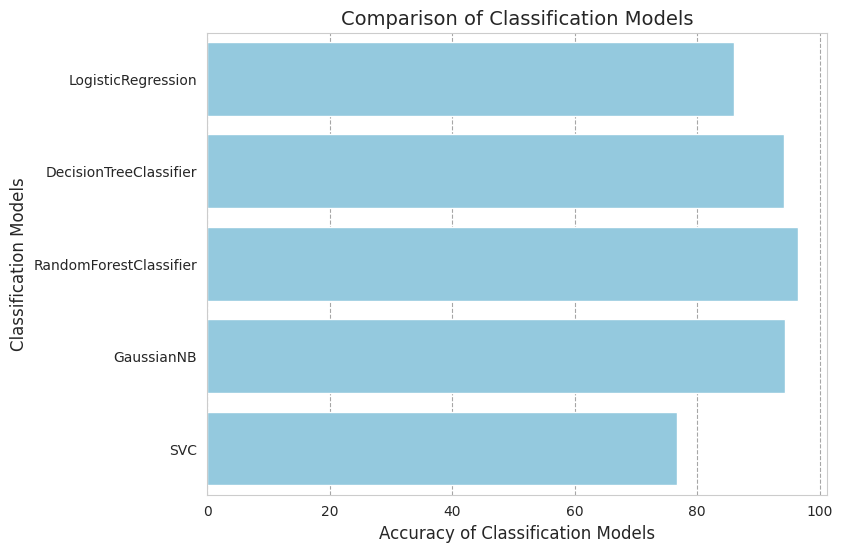

In [ ]:
# We are comparing each classification model by plottig the bar plot with accuracy
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x='Accuracy', y='Classifiers', data=app, color="skyblue")

plt.xlabel('Accuracy of Classification Models', fontsize=12)
plt.ylabel('Classification Models', fontsize=12)
plt.title('Comparison of Classification Models', fontsize=14)

# adding horizontal grid lines
plt.grid(axis='x', color='gray', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
name = rfc.__class__.__name__    
print(name)
print('Test Data Results')
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
cm_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_rf)
precision = precision_score(y_test, y_pred)
print("Precision:", precision*100)

RandomForestClassifier
Test Data Results
Accuracy: 96.4339908952959
Confusion Matrix:
 [[340  43]
 [  4 931]]
Precision: 95.58521560574948
